In [ ]:

# AI : 인간이 가지고 있는 
# 학습능력, 응용력, 추론능력을 컴퓨터를 통해서 구현하고자 하는 
# 가장 포괄적인 개념

# Machine Learning : AI를 구현하는 하나의 방법. 데이터를 이용해서 
# 데이터의 특성과 패턴을 학습하고 그 결과를 바탕으로 
# 미지의 데이터에 대한 미래 결과를 예측하는 프로그래밍 기법

# 이런 머신러닝을 구현하기 위한 여러 방법.
# Regression, SVM(Support Vector Machine), Random Forest, Descision Tree, Neutral Network, Clustering, Reinforcement Learning, KNN

# Deep Learning : 머신러닝의 한 부분, Neutral Network 이용해서 학습하는
# 알고리즘의 집합 (CNN, RNN, LSTM, GAN, ...)

# AI > 머신러닝 > 딥러닝


#################################################################

# 머신러닝 개념은 60년대에 생김 
# Explicit programming의 한계 때문에

# Machine Learning
# 프로그램 자체가 데이터를 통해 배우는 능력을 가지는 프로그램을 지칭

#################################################################

# Machine Learning의 타입
# 학습방법에 따라 4가지

# - 지도학습(Supervised Learning)
# - 비지도학습(Unsupervised Learning)
# - 준지도학습(SemiSupervised Learning)
# - 강화학습(Reinforcement Learning)

# - 지도학습(Supervised Learning)
# 우리가 해결해야 하는 현실세계의 대부분의 문제가 지도학습 문제

#################################################################

# 지도학습
# 지도학습은 학습에 사용되는 데이터x와 그 정답(label, t)을 이용해서
# 데이터의 특성과 분포를 학습하고 미래결과를 예측하는 방법

# 어떤 종류의 미래값을 예측하냐에 따라 
# Regression(회귀) : 학습된 결과를 바탕으로 연속적인 숫자값을 예측
# Classification(분류) : 학습된 결과를 바탕으로 주어진 값이 어떤종류의 입력값인지 구분하는 방식. '어떤것'인가 예측
# Linear Regression(선형회귀) : '얼마나'를 예측하는 방법

# 비지도학습
# 따로 label이 주어지지 않음
# Clustering

# 준지도학습
# 지도 + 비지도

# 강화학습
# Agent, Enviroment, Action, Reward
# 주로 게임쪽, 알파고도 이거



In [3]:
## 수치미분

import numpy as np

def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # 미분한 결과를 저장할 어레이
    # iterator를 이용해서 x에 대한 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)  # f(x + delta_x)
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)  # f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
    
    return derivative_x
# 여기까지 수치미분함수

def my_func(x):
    return x**2

result = numerical_derivative(my_func, np.array([3.0]))
print(result)

# 2변수함수 # f(x,y) = 2x + 3xy + np.power(y,3)
def my_func2(input_data):
    x = input_data[0]
    y = input_data[1]
    return 2*x + 3*x*y + np.power(y,3)

result2 = numerical_derivative(my_func2, np.array([1.0, 2.0]))
print(result2)

[6.]
[ 8.         15.00000001]


,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40
5,7,44
6,8,46
7,10,49
8,12,60
9,13,62


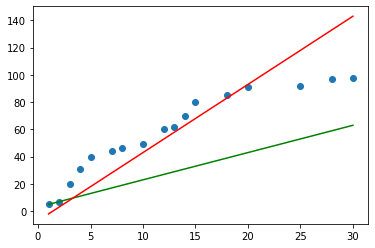

In [9]:
# 머신러닝에서의 Regression
# - Linear
#   => Training Data Set을 이용해서 학습된 결과를 만들고 연속적인 숫자값을 예측하는 것을 의미
# - Logistic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = { '공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30], 
        '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]}
df = pd.DataFrame(data)

display(df)

plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
plt.plot(df['공부시간(x)'], df['공부시간(x)']*2 + 3, color='g')  # y = ax + b
plt.plot(df['공부시간(x)'], df['공부시간(x)']*5 - 7, color='r')
plt.show()

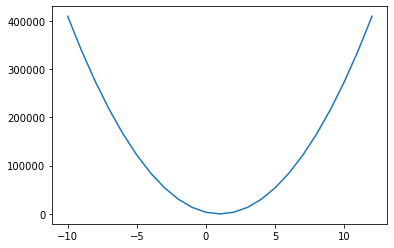

In [10]:
# 가장 데이터를 잘 표현하는 직선을 predictive model이라고 함
# y = Wx + b (W : weight, 가중치) (b : bias, 바이어스)

# error = t - y

# 단순히 오차의 합을 구하는 것은 좋지 않음 
# 절대값의 합x 최소제곱법o (least squared Method) : 오차의 제곱의 평균

# loss function 의 모양을 보자
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training data set
x = np.arange(1,101)
t = np.arange(1,101)

# W
W = np.arange(-10,13)

loss = []

for tmp in W:
    loss.append(np.power((t-tmp*x), 2).mean())

plt.plot(W, loss)
plt.show()
# 포물선

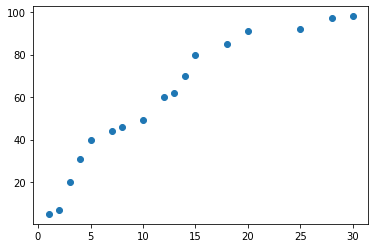

W : [[0.34993399]], b : [0.5927364], loss : 3473.032117071227
W : [[3.91667166]], b : [3.63317917], loss : 145.44516887590535
W : [[3.79150114]], b : [5.97909067], loss : 126.99334551652106
W : [[3.68852175]], b : [7.90910206], loss : 114.50411209944123
W : [[3.6037993]], b : [9.49694711], loss : 106.05069542018569
W : [[3.53409705]], b : [10.80328753], loss : 100.32894684149439
W : [[3.47675212]], b : [11.8780305], loss : 96.45614510462981
W : [[3.42957371]], b : [12.76223529], loss : 93.8348147391419
W : [[3.39075943]], b : [13.48968187], loss : 92.06055069158732
W : [[3.35882642]], b : [14.08816147], loss : 90.85962884217194
W : [[3.33255473]], b : [14.58053829], loss : 90.04677728809293
W : [[3.31094067]], b : [14.985623], loss : 89.49659356940099
W : [[3.29315851]], b : [15.31889137], loss : 89.12419823744342
W : [[3.2785289]], b : [15.59307551], loss : 88.87214010022123
W : [[3.26649294]], b : [15.81865032], loss : 88.7015329548363
W : [[3.25659079]], b : [16.00423359], loss : 88

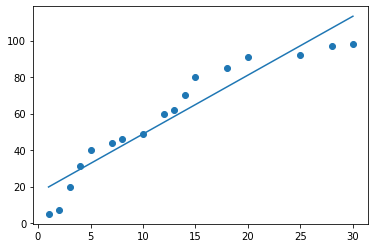

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. training data set 준비
x_data = np.array([1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30]).reshape(-1,1)
t_data = np.array([5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]).reshape(-1,1)

plt.scatter(x_data.ravel(), t_data.ravel())
plt.show()

# 2. Linear Regression Model을 정의  # y=Wx+b
W = np.random.rand(1,1) # matrix
b = np.random.rand(1) # scalar
# Hypothesis는 따로 안씀

# 3. loss function을 정의
def loss_func(x, t):
    y = np.dot(x, W) + b  # y=Wx+b
    return np.mean(np.power((t-y),2))  # 최소제곱법

# 미분함수
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # 미분한 결과를 저장할 어레이
    # iterator를 이용해서 x에 대한 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)  # f(x + delta_x)
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)  # f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
    
    return derivative_x

# 학습 종료 후 임의의 데이터에 대한 예측값을 알아오는 함수
# prediction
def predict(x):
    return np.dot(x,W) + b

# learning rate라는 상수 정의
learning_rate = 0.0001

# 미분을 진행할 loss_func에 대한 lambda함수 정의
f = lambda x : loss_func(x_data, t_data)

# 학습 진행
for step in range(60000):
    W = W - learning_rate * numerical_derivative(f, W) # W의 편미분
    b = b - learning_rate * numerical_derivative(f, b) # b의 편미분
    if step % 3000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data, t_data)))


# 학습종료후 예측
print(predict(19))
# 데이터 분포를 sactter로 확인
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), np.dot(x_data,W)+b)
plt.show()

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
4,56,NaN
...,...,...
148,70,30.0
149,77,NaN
150,75,14.0
151,76,18.0


(116, 2)
W : [[0.32524396]], b : [0.48787885], loss : 1213.4968395367478
W : [[0.56379199]], b : [0.36229848], loss : 867.457361345674
W : [[0.56541316]], b : [0.23420011], loss : 866.9103114512887
W : [[0.56703292]], b : [0.10621309], loss : 866.3642122462887
W : [[0.56865127]], b : [-0.02166267], loss : 865.819062078526
W : [[0.57026822]], b : [-0.14942726], loss : 865.2748592987083
W : [[0.57188376]], b : [-0.27708079], loss : 864.7316022604291
W : [[0.5734979]], b : [-0.40462335], loss : 864.1892893201281
W : [[0.57511063]], b : [-0.53205504], loss : 863.6479188371126
W : [[0.57672196]], b : [-0.65937595], loss : 863.1074891735284


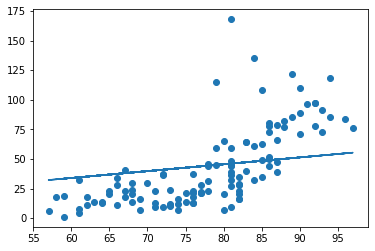

In [11]:
# 예제
# Simple Linear Regression
# 온도에따른 오존량 예측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from my_library.machine_learning_library import numerical_derivative

# 미분함수
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # 미분한 결과를 저장할 어레이
    # iterator를 이용해서 x에 대한 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)  # f(x + delta_x)
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)  # f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
    
    return derivative_x

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')
# display(df.head())

# 2. Data Preprocessing(데이터전처리)
# - 결측치처리
# - 이상치처리
# - 데이터정규화

# 필요한 컬럼만 추출
training_data = df[['Temp', 'Ozone']]
display(training_data)

# 결치값 제거
training_data = training_data.dropna(how='any')
print(training_data.shape)

# 3. training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# 4. Simple Linear Regression
W = np.random.rand(1,1)
b = np.random.rand(1)

# 5. loss function
def loss_func(x, t):
    y = np.dot(x, W) + b  # y=Wx+b
    return np.mean(np.power((t-y),2))  # 최소제곱법

# 6. prediction
def predict(x):
    return np.dot(x,W) + b

# 7. 프로그램에서 필요한 변수 정의
learning_rate = 1e-5
f = lambda x : loss_func(x_data, t_data)

# 8. 학습 진행
for step in range(30000):
    W = W - learning_rate * numerical_derivative(f, W) # W의 편미분
    b = b - learning_rate * numerical_derivative(f, b) # b의 편미분
    if step % 3000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data, t_data)))


plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), np.dot(x_data,W)+b)
plt.show()

(116, 2)
W : [[2.4287033]], b : [-146.99549097]


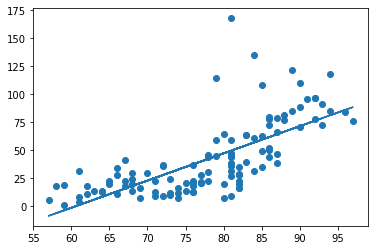

[[3.58411393]]


In [36]:
# 위의 문제를 sklearn으로 해결해보아요

# sklearn : 데이터분석, 머신러닝 라이브러리. 유명하고 효율 좋음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


df = pd.read_csv('./data/ozone.csv')

training_data = df[['Temp', 'Ozone']]
# display(training_data)

training_data = training_data.dropna(how='any')
print(training_data.shape)

# training data set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# sklearn
# 학습되지 않은 모델 생성
model = linear_model.LinearRegression()

# 학습을 진행
model.fit(x_data, t_data)

# w와 b 값을 알아내자
print('W : {}, b : {}'.format(model.coef_, model.intercept_))

plt.scatter(x_data, t_data)
plt.plot(x_data, np.dot(x_data,model.coef_)+model.intercept_)
plt.show()

# 예측을 해보자
predict_val = model.predict([[62]])
print(predict_val)

8.473333333333333
8.0
4.5
8.0
11.5
22.0
-6.0


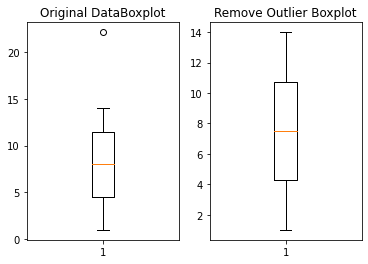

In [42]:
# 왜 다르게 나오지?
# 데이터 전처리가 잘 안되서

# - 결측치처리
# - 이상치처리
# - 데이터정규화

# 이상치처리(Outlier)
# Z-Score : 분산, 표준편차 이용
# Tukey Outlier : 4분위값을 이용
# 쉽지않음

# tukey outlier를 이용하자
# boxplot을 이용

# IQR value : 3사분위값 - 1사분위값
# 1사분위수 - 1.5 * IQR 보다 적은 값
# 3사분위수 + 1.5 * IQR 보다 큰 값

import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)  # 1행2열의 subplot의 위치가 1번 위치
fig_2 = fig.add_subplot(1,2,2)


print(np.mean(data))
print(np.median(data)) # 중위수, 2사분위
print(np.percentile(data,25))  # 1사분위
print(np.percentile(data,50))  # 2사분위
print(np.percentile(data,75))  # 3사분위

IQR_val = np.percentile(data,75) - np.percentile(data,25)
upper_fense = np.percentile(data,75) + 1.5 * IQR_val
lower_fense = np.percentile(data,25) - 1.5 * IQR_val
print(upper_fense)
print(lower_fense)

# boolean indexing으로 데이터 제거하자
result_data = data[(data<=upper_fense) & (data>=lower_fense)]

# 그레프 그려보자
fig_1.set_title('Original DataBoxplot')
fig_1.boxplot(data)
fig_2.set_title('Remove Outlier Boxplot')
fig_2.boxplot(result_data)

plt.show()

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from scipy import stats

# - 이상치 처리  -  정규분포

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 1.8  # zscore outlier 임계값( 일반적으로 2 )

print(np.abs(stats.zscore(data)))

outliers = data[np.abs(stats.zscore(data)) > zscore_threshold]
print(outliers)

print(data[np.isin(data,outliers, invert=True)])

[1.40160702 1.21405925 1.02651147 0.8389637  0.65141593 0.46386816
 0.27632038 0.08877261 0.09877516 0.28632293 0.4738707  0.66141848
 0.84896625 1.03651402 2.55565098]
[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [ ]:
# 정규화
# 각 feature마다 스케일이 달라서 맞춰줄 필요가 있음

# Min-Max Nomalization (정규화)
# Standardization - Z-Score Nomalization (표준화)

# 입력값도 정규화가 필요함

In [5]:
# 예제 진화
# Multiple Linear Regression
# 온도, 바람, 태양광에따른 오존량 예측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from my_library.machine_learning_library import numerical_derivative

# 미분함수
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # 미분한 결과를 저장할 어레이
    # iterator를 이용해서 x에 대한 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)  # f(x + delta_x)
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)  # f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
    
    return derivative_x

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')
# display(df)

# 2. Data Preprocessing(데이터전처리)
# - 결측치처리
# - 이상치처리
# - 데이터정규화

# 필요한 컬럼만 추출
training_data = df[['Temp', 'Wind', 'Solar.R', 'Ozone']]
display(training_data)

# 결치값 제거
training_data = training_data.dropna(how='any')
print(training_data.shape)

# 3. training Data Set
x1_data = training_data['Temp'].values.reshape(-1,1)
x2_data = training_data['Wind'].values.reshape(-1,1)
x3_data = training_data['Solar.R'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# 이상치 처리

# 데이터 정규화

# 합체

# 4. Simple Linear Regression
W = np.random.rand(3,1)
b = np.random.rand(1)

# 5. loss function
def loss_func(x, t):
    y = np.dot(x, W) + b  # y=Wx+b
    return np.mean(np.power((t-y),2))  # 최소제곱법

# 6. prediction
def predict(x):
    return np.dot(x,W) + b

# 7. 프로그램에서 필요한 변수 정의
learning_rate = 1e-4
f = lambda x : loss_func(x_data, t_data)

# # 8. 학습 진행
# for step in range(30000):
#     W = W - learning_rate * numerical_derivative(f, W) # W의 편미분
#     b = b - learning_rate * numerical_derivative(f, b) # b의 편미분
#     if step % 3000 == 0:
#         print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data, t_data)))


# plt.scatter(x_data.ravel(), t_data.ravel())
# plt.plot(x_data.ravel(), np.dot(x_data,W)+b)
# plt.show()

,Temp,Wind,Solar.R,Ozone
0,67,7.4,190.0,41.0
1,72,8.0,118.0,36.0
2,74,12.6,149.0,12.0
3,62,11.5,313.0,18.0
4,56,14.3,NaN,NaN
...,...,...,...,...
148,70,6.9,193.0,30.0
149,77,13.2,145.0,NaN
150,75,14.3,191.0,14.0
151,76,8.0,131.0,18.0


(111, 4)
[[0.15675232]
 [0.59445154]
 [0.01977232]]


In [9]:
# 텐서플로우를 이용한 linear regression
# 버전이 2개임 1,2
# pip install tensorflow==1.15

import tensorflow as tf

print(tf.__version__)

node = tf.constant('Hello World')  # 노드 생성

# Graph를 실행하기 위해 Session이 필요
sess = tf.Session()

# runner인 session이 생성되었으니 node를 실행
print(sess.run(node).decode())

1.15.0
Hello World


In [12]:
import tensorflow as tf

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()

print(sess.run(node3))
print(sess.run([node3, node2]))

30.0
[30.0, 20.0]


In [13]:
# placeholder를 이용
import tensorflow as tf

node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()

print(sess.run(node3, feed_dict={ node1 : 20, node2 : 40 }))


60.0


In [15]:
import tensorflow as tf

# 1. Raw Data Loading
# 2. Data Preprocessiong
# 3. Training Data Set
x_data = [2,4,5,7,10]
t_data = [7,11,13,17,23]

# 4. Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 5. Hypothsis, Simple Linear model
H = W * x_data + b

# 6. Loss function
loss = tf.reduce_mean(tf.square(t_data-H))

# 7. train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

# 8.실행준비 및 초기화작업
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화 직업

# 9. 반복해서 학습 진행
for step in range(30000):
    _, W_val, b_val = sess.run([train,W,b])
    
    if step % 3000 == 0:
        print('W : {}, b : {}'.format(W_val, b_val))
        
print(sess.run(H))

W : [0.3247471], b : [-0.6196845]
W : [2.1553857], b : [1.9286132]
W : [2.0503397], b : [2.6529086]
W : [2.0163095], b : [2.8875456]
W : [2.0052855], b : [2.9635606]
W : [2.0017126], b : [2.988189]
W : [2.000557], b : [2.9961522]
W : [2.0001848], b : [2.9987307]
W : [2.00006], b : [2.9995937]
W : [2.0000525], b : [2.9996467]
[ 6.9997516 10.999857  12.999908  17.000013  23.000172 ]


In [1]:
# 예측까지 하자
import tensorflow as tf

# 1. Raw Data Loading
# 2. Data Preprocessiong

# 3. Training Data Set
x_data = [1,2,3,4,5]
t_data = [2,4,6,8,10]

# 4. placeholder
X = tf.placeholder(dtype=tf.float32)
T = tf.placeholder(dtype=tf.float32)

# 5. Weight & bias      shape => (3,4)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 6. Hypothsis, Simple Linear model
H = W * X + b

# 7. Loss function
loss = tf.reduce_mean(tf.square(H-T))

# 8. train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

# 9.실행준비 및 초기화작업
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화 직업

# 10. 반복해서 학습 진행
for step in range(3000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], feed_dict={X:x_data, T:t_data})
    
    if step % 300 == 0:
        print('W : {}, b : {}, cost : {}'.format(W_val, b_val, loss_val))
        

# 가설 실행        
print(sess.run(H, feed_dict={X:[6]}))

W : [-0.40534973], b : [0.43153498], cost : 60.417694091796875
W : [1.7432312], b : [0.9207554], cost : 0.1546015590429306
W : [1.7694559], b : [0.8323329], cost : 0.12618312239646912
W : [1.7916974], b : [0.7520381], cost : 0.10301170498132706
W : [1.8117925], b : [0.679489], cost : 0.08409526199102402
W : [1.829949], b : [0.61393857], cost : 0.06865257769823074
W : [1.8463535], b : [0.55471194], cost : 0.056045688688755035
W : [1.861176], b : [0.50119835], cost : 0.045753754675388336
W : [1.8745683], b : [0.4528478], cost : 0.037351787090301514
W : [1.8866688], b : [0.40916175], cost : 0.030492786318063736
[11.755218]


In [20]:
## 온도, 태양광 바람에 따른 오존량을 학습하고 예측
# with tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('./data/ozone.csv')

df = df[['Ozone', 'Solar.R', 'Wind', 'Temp']]
# display(training_data)

df = df.dropna(how='any')  # 결측치제거
print(df.shape)  # 111x4
print(df.head()) 

# 이상치제거
zscore_threshold = 2.0

for col in df.columns:
    outliers = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[~df[col].isin(outliers)]
print(df.shape)

# 정규화
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

training_data_x = df.iloc[:,1:]
training_data_t = df['Ozone'].values.reshape(-1,1)

scaler_x.fit(training_data_x)
scaler_t.fit(training_data_t)

training_data_x = scaler_x.transform(training_data_x)
training_data_t = scaler_t.transform(training_data_t)
# 데이터 준비 완료

# Training Data Set
x_data = training_data_x
t_data = training_data_t

# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random.normal([3,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothsis, Simple Linear model
H = tf.matmul(X,W) + b

# Loss function
loss = tf.reduce_mean(tf.square(H-T))

# train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

# 실행준비 및 초기화작업
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화 직업

# 10. 반복해서 학습 진행
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], feed_dict={X:x_data, T:t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, cost : {}'.format(W_val, b_val, loss_val))
        



(111, 4)
   Ozone  Solar.R  Wind  Temp
0   41.0    190.0   7.4    67
1   36.0    118.0   8.0    72
2   12.0    149.0  12.6    74
3   18.0    313.0  11.5    62
6   23.0    299.0   8.6    65
(96, 4)
W : [[ 0.46799526]
 [-0.4661673 ]
 [ 0.9444976 ]], b : [0.07500867], cost : 0.12171905487775803
W : [[ 0.3012153]
 [-0.4312951]
 [ 0.764676 ]], b : [-0.0449199], cost : 0.026111701503396034
W : [[ 0.2539898]
 [-0.3684366]
 [ 0.7071227]], b : [-0.01630242], cost : 0.022601673379540443
W : [[ 0.2233481 ]
 [-0.33293885]
 [ 0.6717657 ]], b : [0.00365514], cost : 0.02129290997982025
W : [[ 0.2033245 ]
 [-0.3134989 ]
 [ 0.64966035]], b : [0.01789739], cost : 0.020793193951249123
W : [[ 0.1901436 ]
 [-0.30340058]
 [ 0.6355088 ]], b : [0.02830175], cost : 0.020594915375113487
W : [[ 0.18140134]
 [-0.29866597]
 [ 0.6261734 ]], b : [0.03607747], cost : 0.020511433482170105
W : [[ 0.17555796]
 [-0.29694822]
 [ 0.61979103]], b : [0.04201416], cost : 0.020473236218094826
W : [[ 0.17162102]
 [-0.2968725 ]


In [22]:
# 가설 실행        
predict_data_x = np.array([[150,8,85]])
predict_data_x = scaler_x.transform(predict_data_x)
result = sess.run(H, feed_dict={X:predict_data_x})

result = scaler_t.inverse_transform(result)
print(result)

[[54.4192]]


[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[[-0.17382295]]
[4.5982984]


C:\Users\hjeio\anaconda3\envs\data_env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


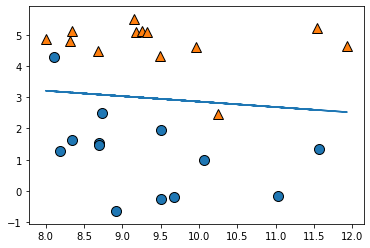

In [34]:
# Logistic Regression 이란 무엇인가
# Deep learning의 기본 구성요소
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import mglearn # dataset을 가져오기위한 utility module

# training data set
x, y = mglearn.datasets.make_forge()
print(x)

mglearn.discrete_scatter(x[:,0], x[:,1], y)

# liniear Regression으로 x를 학습해서 
# 각 점들을 가장 잘 표현할 수 있는 직선을 그리자
model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1,1), (x[:,1].reshape(-1,1)))
print(model.coef_)
print(model.intercept_)

plt.plot(x[:,0], x[:,0]*model.coef_.ravel() + model.intercept_)

[[0.1292517]] [-0.27210884]


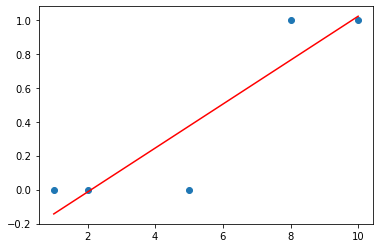

In [41]:
# 공부시간에 따른 시험합격여부에 대한 데이터를 학습하고
# 특정 시간을 입력했을 때 합격여부를 알아보기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,5,8,10])
t_data = np.array([0,0,0,1,1])  # 0:Fail 1:Pass

# linear regression model 생성
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1), t_data.reshape(-1,1))
print(model.coef_, model.intercept_)

plt.plot(x_data, x_data*model.coef_.ravel() + model.intercept_, color='r')
plt.scatter(x_data, t_data)

# 이건 안됨 # 1이상의 값이 나옴

# Sigmoid 필요 # 직선을 곡선으로 바꿔줌 최소0 최대1

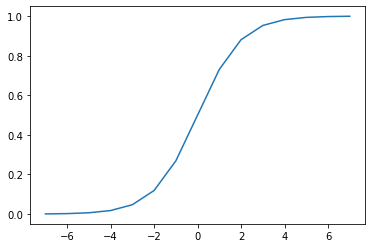

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

x_data = np.arange(-7,8)
y_data = 1 / ( 1 + np.exp(-1 * x_data) )

plt.plot(x_data, y_data)
plt.show()

In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

x_data = np.array([[1,0],
                   [2,0],
                   [5,1],
                   [2,3],
                   [3,3],
                   [8,1],
                   [10,0]]
                 )
t_data = np.array([[0],
                   [0],
                   [0],
                   [1],
                   [1],
                   [1],
                   [1]]
                 )

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothsis, Simple Linear model
logit = tf.matmul(X,W) + b  # Linear Regression Hypothesis
H = tf.sigmoid(logit)  # 오우!!

# Loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=T))

############# Linear 애서 했던 그대로 실행
# train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

# 실행준비 및 초기화작업
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화 직업

# 반복해서 학습 진행
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], feed_dict={X:x_data, T:t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, cost : {}'.format(W_val, b_val, loss_val))
        




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W : [[-0.00474952]
 [ 0.9900877 ]], b : [0.22557357], cost : 0.5759764909744263
W : [[0.09257799]
 [0.8846702 ]], b : [-0.25284296], cost : 0.49096912145614624
W : [[0.15198416]
 [0.8594315 ]], b : [-0.650586], cost : 0.4365575611591339
W : [[0.19846503]
 [0.88479865]], b : [-0.98475456], cost : 0.3982789218425751
W : [[0.23592058]
 [0.9330262 ]], b : [-1.272327], cost : 0.3694176971912384
W : [[0.2673483 ]
 [0.98848355]], b : [-1.5250899], cost : 0.3467392921447754
W : [[0.29461163]
 [1.0441235 ]], b : [-1.7509642], cost : 0.3284360468387604
W : [[0.3188291]
 [1.097281 ]], b : [-1.9554354], cost : 0.3133509159088135
W : [[0.34070295]
 [1.1471705 ]], b : [-2.1424727], cost : 0.300692617893219
W : [[0.36070228]
 [1.1937768 ]], b : [-2.3150573], cost : 0.2899010479450226


In [46]:
print(sess.run(H, feed_dict={X:[[4,2]]}))

[[0.819931]]
